In [1]:
import warnings
warnings.filterwarnings('ignore')
!pip install PYPDF2

     |████████████████████████████████| 81kB 3.8MB/s 
  Created wheel for PYPDF2: filename=PyPDF2-1.26.0-cp37-none-any.whl size=61102 sha256=09110900ece7b2464053b2d2de32ff264469201af49bd66629237d1297dcf470
  Stored in directory: /root/.cache/pip/wheels/53/84/19/35bc977c8bf5f0c23a8a011aa958acd4da4bbd7a229315c1b7
Successfully built PYPDF2


# Projeto 2
Ler o conjunto de dados Iris e visualizar os grupos em todas as combinações de 2 entre os 4 atributos. Cada grupo deve ser marcado com cor respectiva, e os scatterplots precisam incluir legenda das cores e/ou marcas. Aplicar k-vizinhos nestas configurações 2-a-2, reservando 25 casos de cada categoria para treinamento e 25 para teste. Obter, apresentar e discutir brevemente o desempenho para cada configuração de atributos utilizando-se as respectivas
matrizes de confusão, que também necessitam ser apresentadas.

## Pairplot

In [2]:
# Load Iris dataset
import seaborn as sns
#import numpy as np
#import pandas as pd
df = sns.load_dataset('iris')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [3]:
# Show some statistics for iris dataset
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [4]:
# Show some columns information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


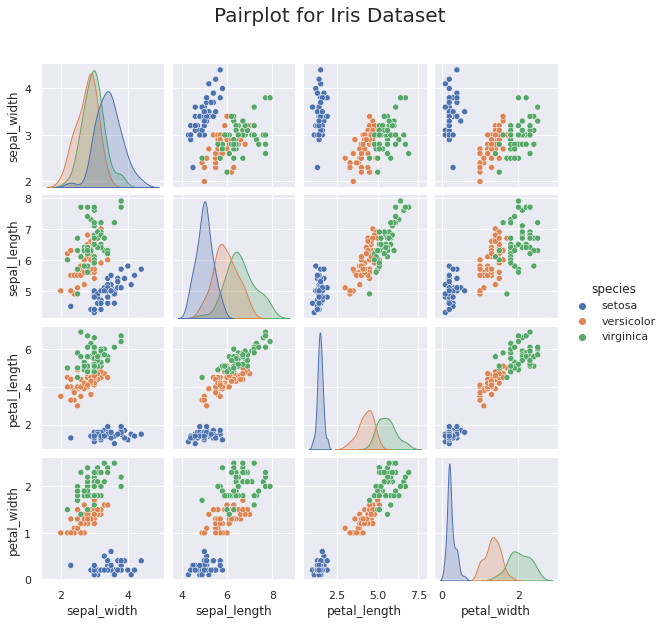

In [5]:
from matplotlib import pyplot as plt

sns.set(rc={'figure.figsize':(11.7,8.27)})

# Plot pair plot for all features
g = sns.pairplot(df, vars=["sepal_width",
                             "sepal_length",
                             "petal_length",
                             "petal_width"], hue='species', height=2.0)

# Configure title
g.fig.suptitle("Pairplot for Iris Dataset", y=1.08, fontsize=20)

# Save figure
g.savefig('p1.pdf')

## K-Nearest Neighbor Algorithm
A seguir está a implementação do algoritmo K-Nearest Neighbor:

### Algoritmo KNN

In [6]:
# KNN algorithm
import numpy as np
import scipy.spatial
from collections import Counter

class knn:
    def __init__(self, k):
        self.k = k
        
    def fit(self, X, y):
        self.X_train = X
        self.y_train = y
        
    def distance(self, X1, X2):
        distance = scipy.spatial.distance.euclidean(X1, X2)
    
    def predict(self, X_test):
        final_output = []
        for i in range(len(X_test)):
            d = []
            votes = []
            for j in range(len(X_train)):
                dist = scipy.spatial.distance.euclidean(X_train[j],
                                                        X_test[i])
                d.append([dist, j])
            d.sort()
            d = d[0:self.k]
            for d, j in d:
                votes.append(y_train[j])
            ans = Counter(votes).most_common(1)[0][0]
            final_output.append(ans)
            
        return final_output
    
    def score(self, X_test, y_test):
        predictions = self.predict(X_test)
        return (predictions == y_test).sum() / len(y_test)

### Split dataset
O código a seguir separa as features dos targets, e divide o dataset em dois conjuntos, o de treinamento e o de teste, cada um com 25 espécies de cada planta.

In [7]:
# Load iris dataset to dataframe
from sklearn.datasets import load_iris
df = load_iris()

# Split dataset between train and test with 25 of each species
from sklearn.model_selection import train_test_split
X_train1, X_test1, y_train1, y_test1 = train_test_split(df.data,
                                                    df.target,
                                                    random_state = 42,
                                                    test_size = 0.5,
                                                    stratify = df.target)

In [8]:
# Show the the number o species in train set
import pandas as pd
class_names = df.target_names
pd.crosstab(class_names[y_train1], class_names[y_train1])

col_0,setosa,versicolor,virginica
row_0,,,
setosa,25,0,0
versicolor,0,25,0
virginica,0,0,25


In [9]:
# Show the number of species in test set
pd.crosstab(class_names[y_test1], class_names[y_test1])

col_0,setosa,versicolor,virginica
row_0,,,
setosa,25,0,0
versicolor,0,25,0
virginica,0,0,25


### KNN 2-a-2
Esta seção aplica algoritmo KNN para cada par de características, a saber:

* Sepal length x Sepal width
* Sepal length x Petal length
* Sepal length x Petal width
* Sepal witdh  x Petal length
* Sepal width x Petal width
* Petal length x Petal width


#### Sepal length x Sepal width

In [10]:
# Load the original dataset splitted
X_train, X_test, y_train, y_test = X_train1, X_test1, y_train1, y_test1

In [11]:
# Show train set
pd.DataFrame(X_train, columns=['sepal_length',
                               'sepal_width',
                               'petal_length',
                               'petal_width']).head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.8,1.5,0.3
1,5.0,2.0,3.5,1.0
2,6.9,3.2,5.7,2.3
3,6.1,2.8,4.7,1.2
4,4.8,3.0,1.4,0.3


In [12]:
# Extract sepal length and sepal width from X_train set
X_train = X_train[:, [0,1]]
pd.DataFrame(X_train, columns=['sepal_length', 'sepal_width']).head()

,sepal_length,sepal_width
0,5.1,3.8
1,5.0,2.0
2,6.9,3.2
3,6.1,2.8
4,4.8,3.0


In [13]:
# Show test set
pd.DataFrame(X_test, columns=['sepal_length',
                              'sepal_width',
                              'petal_length',
                              'petal_width']).head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.7,1.5,0.4
1,5.0,3.4,1.5,0.2
2,5.0,3.2,1.2,0.2
3,5.1,3.3,1.7,0.5
4,6.4,2.8,5.6,2.2


In [14]:
# Extract sepal length and sepal width from X_test set
X_test = X_test[:, [0,1]]
pd.DataFrame(X_test, columns=['sepal_length', 'sepal_width']).head()

,sepal_length,sepal_width
0,5.1,3.7
1,5.0,3.4
2,5.0,3.2
3,5.1,3.3
4,6.4,2.8


In [15]:
# Show train target
pd.DataFrame(y_train, columns=['species']).head()

,species
0,0
1,1
2,2
3,1
4,0


In [16]:
# Show test target
pd.DataFrame(y_test, columns=['species']).head()

,species
0,0
1,0
2,0
3,0
4,2


In [17]:
# Run K-Nearest Neighbor Algorithm
clf = knn(3)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
for i in y_pred:
    print(i, end= ' ')

0 0 0 0 1 0 2 1 1 2 1 0 1 2 0 0 0 1 2 1 1 2 1 1 2 2 1 0 1 1 2 0 0 2 0 1 2 2 1 2 1 0 0 1 1 0 1 0 2 1 2 1 1 0 1 1 2 0 2 0 1 1 2 0 0 2 0 0 2 0 1 0 2 2 1 

In [18]:
# Compare predictions with real values
y_pred == y_test

array([ True,  True,  True,  True, False,  True, False, False,  True,
        True,  True,  True,  True, False,  True,  True,  True, False,
       False,  True, False,  True, False,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True, False,  True, False,
        True,  True,  True, False,  True,  True,  True,  True, False,
        True,  True,  True, False,  True, False,  True, False,  True,
        True, False,  True, False, False,  True,  True, False,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True, False])

In [19]:
# Create the confusion matrix
df_cm = []
class_names = df.target_names
cm = pd.crosstab(class_names[y_test], class_names[y_pred])
df_cm.append(cm)
cm

col_0,setosa,versicolor,virginica
row_0,,,
setosa,25,0,0
versicolor,0,17,8
virginica,1,11,13


#### Sepal length x Petal length

In [20]:
# Load the original dataset splitted
X_train, X_test, y_train, y_test = X_train1, X_test1, y_train1, y_test1

In [21]:
# Show train set
pd.DataFrame(X_train, columns=['sepal_length',
                               'sepal_width',
                               'petal_length',
                               'petal_width']).head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.8,1.5,0.3
1,5.0,2.0,3.5,1.0
2,6.9,3.2,5.7,2.3
3,6.1,2.8,4.7,1.2
4,4.8,3.0,1.4,0.3


In [22]:
# Extract sepal length and petal length from X_train set
X_train = X_train[:, [0,2]]
pd.DataFrame(X_train, columns=['sepal_length', 'petal_length']).head()

,sepal_length,petal_length
0,5.1,1.5
1,5.0,3.5
2,6.9,5.7
3,6.1,4.7
4,4.8,1.4


In [23]:
# Show test set
pd.DataFrame(X_test, columns=['sepal_length',
                              'sepal_width',
                              'petal_length',
                              'petal_width']).head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.7,1.5,0.4
1,5.0,3.4,1.5,0.2
2,5.0,3.2,1.2,0.2
3,5.1,3.3,1.7,0.5
4,6.4,2.8,5.6,2.2


In [24]:
# Extract sepal length and petal length from X_test set
X_test = X_test[:, [0,2]]
pd.DataFrame(X_test, columns=['sepal_length',
                              'petal_length']).head()

,sepal_length,petal_length
0,5.1,1.5
1,5.0,1.5
2,5.0,1.2
3,5.1,1.7
4,6.4,5.6


In [25]:
# Show train target
pd.DataFrame(y_train, columns=['species']).head()

,species
0,0
1,1
2,2
3,1
4,0


In [26]:
# Show test target
pd.DataFrame(y_test, columns=['species']).head()

,species
0,0
1,0
2,0
3,0
4,2


In [27]:
# Run K-Nearest Neighbor Algorithm
clf = knn(3)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
for i in y_pred:
    print(i, end= ' ')

0 0 0 0 2 0 1 2 1 2 1 0 1 1 0 0 0 2 1 1 2 2 2 1 2 2 1 0 1 1 2 0 0 1 0 2 2 2 1 1 1 0 0 1 2 0 1 0 1 1 1 1 1 0 1 2 2 1 1 0 1 1 2 0 0 2 0 0 1 0 1 0 2 2 1 

In [28]:
# Compare predictions with real values
y_pred == y_test

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True, False,  True,
        True,  True,  True, False,  True,  True,  True, False,  True,
        True,  True,  True,  True,  True, False,  True,  True,  True,
        True,  True, False])

In [29]:
# Create the confusion matrix
class_names = df.target_names
cm = pd.crosstab(class_names[y_test], class_names[y_pred])
df_cm.append(cm)
cm

col_0,setosa,versicolor,virginica
row_0,,,
setosa,25,0,0
versicolor,0,25,0
virginica,0,5,20


#### Sepal length x Petal width

In [30]:
# Load the original dataset splitted
X_train, X_test, y_train, y_test = X_train1, X_test1, y_train1, y_test1

In [31]:
# Show train set
pd.DataFrame(X_train, columns=['sepal_length',
                               'sepal_width',
                               'petal_length',
                               'petal_width']).head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.8,1.5,0.3
1,5.0,2.0,3.5,1.0
2,6.9,3.2,5.7,2.3
3,6.1,2.8,4.7,1.2
4,4.8,3.0,1.4,0.3


In [32]:
# Extract sepal length and petal width from X_train set
X_train = X_train[:, [0,3]]
pd.DataFrame(X_train, columns=['sepal_length',
                               'petal_width']).head()

,sepal_length,petal_width
0,5.1,0.3
1,5.0,1.0
2,6.9,2.3
3,6.1,1.2
4,4.8,0.3


In [33]:
# Show test set
pd.DataFrame(X_test, columns=['sepal_length',
                              'sepal_width',
                              'petal_length',
                              'petal_width']).head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.7,1.5,0.4
1,5.0,3.4,1.5,0.2
2,5.0,3.2,1.2,0.2
3,5.1,3.3,1.7,0.5
4,6.4,2.8,5.6,2.2


In [34]:
# Extract sepal length and petal width from X_test set
X_test = X_test[:, [0,3]]
pd.DataFrame(X_test, columns=['sepal_length', 'petal_width']).head()

,sepal_length,petal_width
0,5.1,0.4
1,5.0,0.2
2,5.0,0.2
3,5.1,0.5
4,6.4,2.2


In [35]:
# Show train target
pd.DataFrame(y_train, columns=['species']).head()

,species
0,0
1,1
2,2
3,1
4,0


In [36]:
# Show test target
pd.DataFrame(y_test, columns=['species']).head()

,species
0,0
1,0
2,0
3,0
4,2


In [37]:
# Run K-Nearest Neighbor Algorithm
clf = knn(3)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
for i in y_pred:
    print(i, end= ' ')

0 0 0 0 2 0 1 2 1 2 1 0 1 1 0 0 0 2 1 1 1 1 2 1 2 2 1 0 1 1 2 0 0 1 0 2 2 2 1 1 1 0 0 1 2 0 1 0 2 1 1 1 2 0 1 2 2 1 1 0 1 2 2 0 0 2 0 0 2 0 1 0 2 2 1 

In [38]:
# Compare predictions with real values
y_pred == y_test

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True, False, False,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True, False,  True,  True,  True,  True,  True,
        True,  True,  True, False,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True, False])

In [39]:
# Create the confusion matrix
class_names = df.target_names
cm = pd.crosstab(class_names[y_test], class_names[y_pred])
df_cm.append(cm)
cm

col_0,setosa,versicolor,virginica
row_0,,,
setosa,25,0,0
versicolor,0,24,1
virginica,0,4,21


#### Sepal width x Petal length

In [40]:
# Load the original dataset splitted
X_train, X_test, y_train, y_test = X_train1, X_test1, y_train1, y_test1

In [41]:
# Show train set
pd.DataFrame(X_train, columns=['sepal_length',
                               'sepal_width',
                               'petal_length',
                               'petal_width']).head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.8,1.5,0.3
1,5.0,2.0,3.5,1.0
2,6.9,3.2,5.7,2.3
3,6.1,2.8,4.7,1.2
4,4.8,3.0,1.4,0.3


In [42]:
# Extract sepal width and petal length from X_train set
X_train = X_train[:, [1, 2]]
pd.DataFrame(X_train, columns=['sepal_width', 'petal_length']).head()

,sepal_width,petal_length
0,3.8,1.5
1,2.0,3.5
2,3.2,5.7
3,2.8,4.7
4,3.0,1.4


In [43]:
# Show test set
pd.DataFrame(X_test, columns=['sepal_length',
                              'sepal_width',
                              'petal_length',
                              'petal_width']).head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.7,1.5,0.4
1,5.0,3.4,1.5,0.2
2,5.0,3.2,1.2,0.2
3,5.1,3.3,1.7,0.5
4,6.4,2.8,5.6,2.2


In [44]:
# Extract sepal width and petal length from X_test set
X_test = X_test[:, [1,2]]
pd.DataFrame(X_test, columns=['sepal_width', 'petal_length']).head()

,sepal_width,petal_length
0,3.7,1.5
1,3.4,1.5
2,3.2,1.2
3,3.3,1.7
4,2.8,5.6


In [45]:
# Show train target
pd.DataFrame(y_train, columns=['species']).head()

,species
0,0
1,1
2,2
3,1
4,0


In [46]:
# Show test target
pd.DataFrame(y_test, columns=['species']).head()

,species
0,0
1,0
2,0
3,0
4,2


In [47]:
# Run K-Nearest Neighbor Algorithm
clf = knn(3)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
for i in y_pred:
    print(i, end= ' ')

0 0 0 0 2 0 1 1 1 2 1 0 1 1 0 0 0 2 1 1 2 2 2 1 2 2 1 0 1 1 2 0 0 2 0 2 2 2 1 1 1 0 0 1 2 0 1 0 1 1 1 1 1 0 1 2 2 1 1 0 1 1 2 0 0 2 0 0 2 0 1 0 2 2 1 

In [48]:
# Compare predictions with real values
y_pred == y_test

array([ True,  True,  True,  True,  True,  True,  True, False,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True, False,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True, False,  True,
        True,  True,  True, False,  True,  True,  True, False,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True, False])

In [49]:
# Create the confusion matrix
class_names = df.target_names
cm = pd.crosstab(class_names[y_test], class_names[y_pred])
df_cm.append(cm)
cm

col_0,setosa,versicolor,virginica
row_0,,,
setosa,25,0,0
versicolor,0,24,1
virginica,0,5,20


#### Sepal width x Petal width

In [50]:
# Load the original dataset splitted
X_train, X_test, y_train, y_test = X_train1, X_test1, y_train1, y_test1

In [51]:
# Show train set
pd.DataFrame(X_train, columns=['sepal_length',
                               'sepal_width',
                               'petal_length',
                               'petal_width']).head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.8,1.5,0.3
1,5.0,2.0,3.5,1.0
2,6.9,3.2,5.7,2.3
3,6.1,2.8,4.7,1.2
4,4.8,3.0,1.4,0.3


In [52]:
# Extract sepal width and petal width from X_train set
X_train = X_train[:, [1, 3]]
pd.DataFrame(X_train, columns=['sepal_width', 'petal_width']).head()

,sepal_width,petal_width
0,3.8,0.3
1,2.0,1.0
2,3.2,2.3
3,2.8,1.2
4,3.0,0.3


In [53]:
# Show test set
pd.DataFrame(X_test, columns=['sepal_length',
                              'sepal_width',
                              'petal_length',
                              'petal_width']).head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.7,1.5,0.4
1,5.0,3.4,1.5,0.2
2,5.0,3.2,1.2,0.2
3,5.1,3.3,1.7,0.5
4,6.4,2.8,5.6,2.2


In [54]:
# Extract sepal width and petal width from X_test set
X_test = X_test[:, [1, 3]]
pd.DataFrame(X_test, columns=['sepal_width', 'petal_width']).head()

,sepal_width,petal_width
0,3.7,0.4
1,3.4,0.2
2,3.2,0.2
3,3.3,0.5
4,2.8,2.2


In [55]:
# Show train target
pd.DataFrame(y_train, columns=['species']).head()

,species
0,0
1,1
2,2
3,1
4,0


In [56]:
# Show test target
pd.DataFrame(y_test, columns=['species']).head()

,species
0,0
1,0
2,0
3,0
4,2


In [57]:
# Run K-Nearest Neighbor Algorithm
clf = knn(3)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
for i in y_pred:
    print(i, end= ' ')

0 0 0 0 2 0 1 2 1 2 1 0 1 1 0 0 0 2 1 1 1 1 2 1 2 2 1 0 1 1 2 0 0 2 0 2 2 2 1 1 1 0 0 1 2 0 1 0 1 1 1 1 2 0 1 2 2 1 1 0 1 2 2 0 0 2 0 0 2 0 1 0 2 2 2 

In [58]:
# Compare predictions with real values
y_pred == y_test

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True, False, False,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True, False,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True, False,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True])

In [59]:
# Create the confusion matrix
class_names = df.target_names
cm = pd.crosstab(class_names[y_test], class_names[y_pred])
df_cm.append(cm)
cm

col_0,setosa,versicolor,virginica
row_0,,,
setosa,25,0,0
versicolor,0,24,1
virginica,0,3,22


#### Petal length x Petal width

In [60]:
# Load the original dataset splitted
X_train, X_test, y_train, y_test = X_train1, X_test1, y_train1, y_test1

In [61]:
# Show train set
pd.DataFrame(X_train, columns=['sepal_length',
                               'sepal_width',
                               'petal_length',
                               'petal_width']).head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.8,1.5,0.3
1,5.0,2.0,3.5,1.0
2,6.9,3.2,5.7,2.3
3,6.1,2.8,4.7,1.2
4,4.8,3.0,1.4,0.3


In [62]:
# Extract petal length and petal width from X_train set
X_train = X_train[:, [2, 3]]
pd.DataFrame(X_train, columns=['petal_length', 'petal_width']).head()

,petal_length,petal_width
0,1.5,0.3
1,3.5,1.0
2,5.7,2.3
3,4.7,1.2
4,1.4,0.3


In [63]:
# Show test set
pd.DataFrame(X_test, columns=['sepal_length',
                              'sepal_width',
                              'petal_length',
                              'petal_width']).head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.7,1.5,0.4
1,5.0,3.4,1.5,0.2
2,5.0,3.2,1.2,0.2
3,5.1,3.3,1.7,0.5
4,6.4,2.8,5.6,2.2


In [64]:
# Extract petal length and petal width from X_test set
X_test = X_test[:, [2, 3]]
pd.DataFrame(X_test, columns=['petal_length', 'petal_width']).head()

,petal_length,petal_width
0,1.5,0.4
1,1.5,0.2
2,1.2,0.2
3,1.7,0.5
4,5.6,2.2


In [65]:
# Show train target
pd.DataFrame(y_train, columns=['species']).head()

,species
0,0
1,1
2,2
3,1
4,0


In [66]:
# Show test target
pd.DataFrame(y_test, columns=['species']).head()

,species
0,0
1,0
2,0
3,0
4,2


In [67]:
# Run K-Nearest Neighbor Algorithm
clf = knn(3)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
for i in y_pred:
    print(i, end= ' ')

0 0 0 0 2 0 1 2 1 2 1 0 1 1 0 0 0 2 1 1 2 1 2 1 2 2 1 0 1 1 2 0 0 2 0 2 2 2 1 1 1 0 0 1 2 0 1 0 1 1 1 1 2 0 1 2 2 1 1 0 1 2 2 0 0 2 0 0 2 0 1 0 2 2 2 

In [68]:
# Compare predictions with real values
y_pred == y_test

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True, False,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True, False,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True, False,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True])

In [69]:
# Create the confusion matrix
class_names = df.target_names
cm = pd.crosstab(class_names[y_test], class_names[y_pred])
df_cm.append(cm)
cm

col_0,setosa,versicolor,virginica
row_0,,,
setosa,25,0,0
versicolor,0,24,1
virginica,0,2,23


#### All features

In [70]:
# Load the original train and test split
X_train, X_test, y_train, y_test = X_train1, X_test1, y_train1, y_test1

In [71]:
# Run K-Nearest Neighbor Algorithm
clf = knn(5)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

In [72]:
# Compare predictions with real values
y_pred == y_test

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True, False,  True,  True,  True, False,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True, False,  True,
        True,  True,  True, False,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True])

In [73]:
# Create the confusion matrix
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[25,  0,  0],
       [ 0, 25,  0],
       [ 0,  4, 21]])

In [74]:
# Transform confusion matrix to dataframe (for plotting)
class_names = df.target_names
df_cm.append(pd.crosstab(class_names[y_test], class_names[y_pred]))

### Matrizes de Confusão
A seguir estão as matrizes de confusão para as aplicações KNN 2-a-2 efetuada na seção anterior:



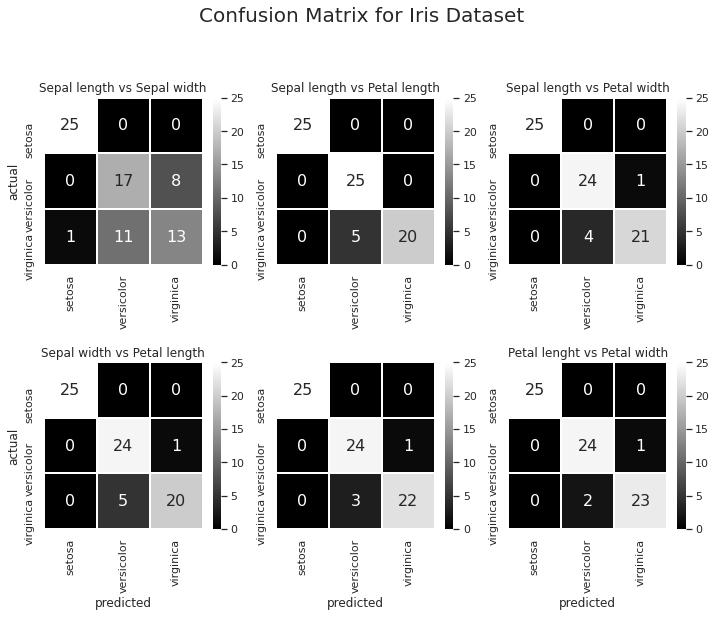

In [75]:
# Show confusion matrix as a figure
fig, ax = plt.subplots(2,3,figsize=(10, 7.5))
plt.figtext(0.5,1.1,'Confusion Matrix for Iris Dataset',fontsize=20,
            ha='center',)

# Generate sepal_lenght x sepal width
g1 = sns.heatmap(df_cm[0], cmap='gray',
            linewidths=1,
            annot=True,
            ax=ax[0,0],
            annot_kws={"size": 16})

# Generate sepal_lenght x petal lenght
g2 = sns.heatmap(df_cm[1], cmap='gray',
            linewidths=1,
            annot=True,
            ax=ax[0,1],
            annot_kws={"size": 16})

# Generate sepal_lenght x petal width
g3 = sns.heatmap(df_cm[2], cmap='gray',
            linewidths=1,
            annot=True,
            ax=ax[0,2],
            annot_kws={"size": 16})

# Generate sepal_width x petal length
g4 = sns.heatmap(df_cm[3], cmap='gray',
            linewidths=1,
            annot=True,
            ax=ax[1,0],
            annot_kws={"size": 16})

# Generate sepal_width x petal width
g5 = sns.heatmap(df_cm[4], cmap='gray',
            linewidths=1,
            annot=True,
            ax=ax[1,1],
            annot_kws={"size": 16})

# Generate petal length x petal width
g6 = sns.heatmap(df_cm[5], cmap='gray',
            linewidths=1,
            annot=True,
            ax=ax[1,2],
            annot_kws={"size": 16})

# Setup graphs subtitles
ax[0,0].set_title('Sepal length vs Sepal width', fontsize=12)
ax[0,1].set_title('Sepal length vs Petal length', fontsize=12)
ax[0,2].set_title('Sepal length vs Petal width', fontsize=12)
ax[1,0].set_title('Sepal width vs Petal length', fontsize=12)
ax[1,2].set_title('Sepal width vs Petal width', fontsize=12)
ax[1,2].set_title('Petal lenght vs Petal width', fontsize=12)

# Setup axis labels
g1.set(ylabel='actual')
g2.set(ylabel='')
g3.set(ylabel='')
g4.set(ylabel='actual')
g5.set(ylabel='')
g6.set(ylabel='')
g1.set(xlabel='')
g2.set(xlabel='')
g3.set(xlabel='')
g4.set(xlabel='predicted')
g5.set(xlabel='predicted')
g6.set(xlabel='predicted')

# Adjust graphs positions
plt.tight_layout(pad=0.5, w_pad=0.5, h_pad=1.5)

# Plot graphs
plt.show()

# Save figure
fig.savefig('p2.pdf')

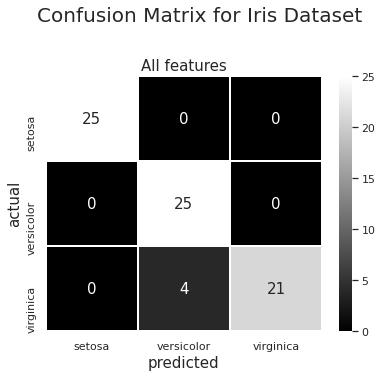

In [76]:
# Show confusion matrix as a figure
fig, ax = plt.subplots(figsize=(7, 6))
fig.suptitle("Confusion Matrix for Iris Dataset", fontsize=20)

# Generate sepal_lenght x sepal width
g7 = sns.heatmap(df_cm[6], cmap='gray',
            linewidths=1,
            annot=True,
            ax=ax,
            annot_kws={"size": 15})

# Setup axis labels
g7.set_ylabel('actual', fontsize=15)
g7.set_xlabel('predicted', fontsize=15)
g7.set_title('All features', fontsize=15)

# Adjust graphs positions
plt.tight_layout(pad=5.0, w_pad=0.0, h_pad=.0)

# Plot graphs
plt.show()

# Save figure
fig.savefig('p3.pdf')

#### Discussão
Como podemos observar que, algumas combinações de características possui uma maior taxa de acerto, conseguindo distinguir melhor as espécies de plantas do tipo Iris. Em particular, para a execução do algoritmo KNN ultilizando os 3 vizinhos mais próximos, as características **Petal length** x **Petal width** foi a que apresentou a maior taxa de acerto, errando apenas 3 previsões.



# Files Generation

In [77]:
# Generate results file
from PyPDF2 import PdfFileMerger

pdfs = ['p1.pdf', 'p2.pdf', 'p3.pdf']
merger = PdfFileMerger()
for pdf in pdfs:
    merger.append(pdf)

merger.write("results.pdf")
merger.close()

In [78]:
# Generate code file
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

!wget -nc https://raw.githubusercontent.com/brpy/colab-pdf/master/colab_pdf.py
from colab_pdf import colab_pdf
colab_pdf('7600064/project2/project2.ipynb')

Mounted at /content/drive
--2021-06-11 23:00:57--  https://raw.githubusercontent.com/brpy/colab-pdf/master/colab_pdf.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1864 (1.8K) [text/plain]
Saving to: ‘colab_pdf.py’

colab_pdf.py        100%[===================>]   1.82K  --.-KB/s    in 0s      

2021-06-11 23:00:57 (21.3 MB/s) - ‘colab_pdf.py’ saved [1864/1864]





Extracting templates from packages: 100%
[NbConvertApp] Converting notebook /content/drive/MyDrive/Colab Notebooks/7600064/project2/project2.ipynb to pdf
[NbConvertApp] Support files will be in project2_files/
[NbConvertApp] Making directory ./project2_files
[NbConvertApp] Making directory ./project2_files
[NbConvertApp] Making directory ./project2_files
[NbConvertApp] Writing 115965 bytes to

'File Download Unsuccessful. Saved in Google Drive'